<a href="https://colab.research.google.com/github/mehrdadzaa/Mehrdadza/blob/main/Churn_risk_rate_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *load* and clean data

In [ ]:
# Import Necessary Libraries
import pandas as pd
from tabulate import tabulate

import seaborn as sns
import matplotlib.pyplot as plt


# Load the Dataset
file_path = '/content/churn dataset.csv'
data = pd.read_csv(file_path)

# Print the data in a clean table format
print(tabulate(data.head(), headers='keys', tablefmt='fancy_grid'))

# Dropping columns that are not useful
data.drop(['customer_id', 'Name', 'security_no', 'referral_id', 'last_visit_time'], axis=1, inplace=True)
data.info()


╒════╤══════════════════════════════════════╤══════════════════╤═══════╤══════════╤═══════════════╤═══════════════════╤═══════════════════════╤════════════════╤═══════════════════════════╤═══════════════╤══════════════════════════╤═══════════════════════╤═══════════════════╤═══════════════════╤═════════════════════════╤══════════════════╤═════════════════════════╤════════════════════════════╤════════════════════╤═════════════════════════╤════════════════════════════════╤══════════════════╤═════════════════════╤══════════════════════════╤════════════════════╕
│    │ customer_id                          │ Name             │   age │ gender   │ security_no   │ region_category   │ membership_category   │ joining_date   │ joined_through_referral   │ referral_id   │ preferred_offer_types    │ medium_of_operation   │ internet_option   │ last_visit_time   │   days_since_last_login │   avg_time_spent │   avg_transaction_value │   avg_frequency_login_days │   points_in_wallet │ used_special_disco

# Explore data for cleaning (based on this part i have done data cleaning above)



<Axes: xlabel='age', ylabel='Count'>

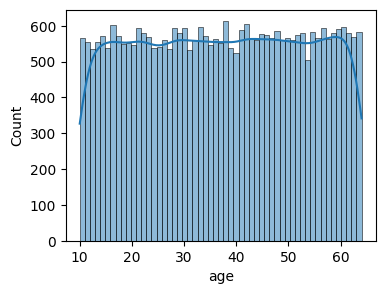

In [ ]:
#age
plt.figure(figsize=(4, 3)) # Set the size of the plot
sns.histplot(data['age'], kde=True, bins=55)


<Axes: xlabel='gender', ylabel='count'>

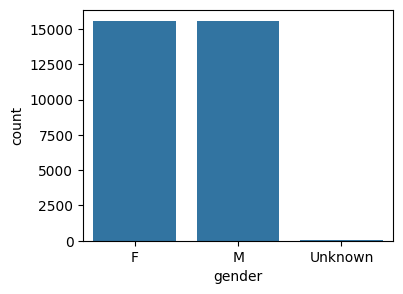

In [ ]:
#gender
plt.figure(figsize=(4, 3)) # Set the size of the plot
sns.countplot(data=data, x='gender')




<Axes: xlabel='region_category', ylabel='count'>

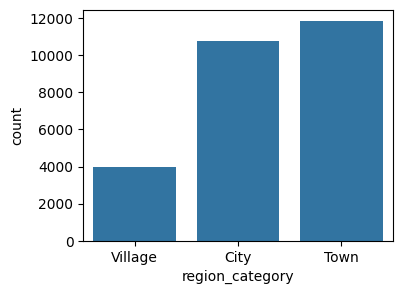

In [ ]:
#region_category
plt.figure(figsize=(4, 3)) # Set the size of the plot
sns.countplot(data=data, x='region_category')

<Axes: xlabel='region_category', ylabel='count'>

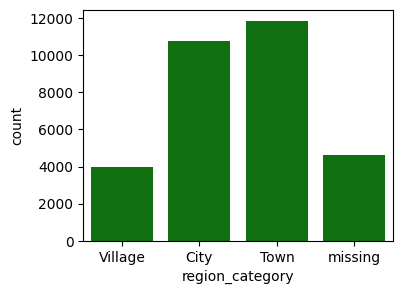

In [ ]:
data['region_category'] = data['region_category'].fillna('missing')
plt.figure(figsize=(4, 3)) # Set the size of the plot
sns.countplot(data=data, x='region_category', color='green')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Platinum Membership'),
  Text(1, 0, 'Premium Membership'),
  Text(2, 0, 'No Membership'),
  Text(3, 0, 'Gold Membership'),
  Text(4, 0, 'Silver Membership'),
  Text(5, 0, 'Basic Membership')])

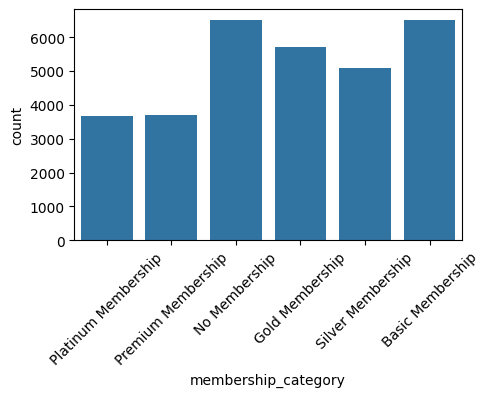

In [ ]:
#membership_category
plt.figure(figsize=(5, 3)) # Set the size of the plot
sns.countplot(data=data, x='membership_category')
plt.xticks(rotation=45)

<Axes: xlabel='joining_date', ylabel='Count'>

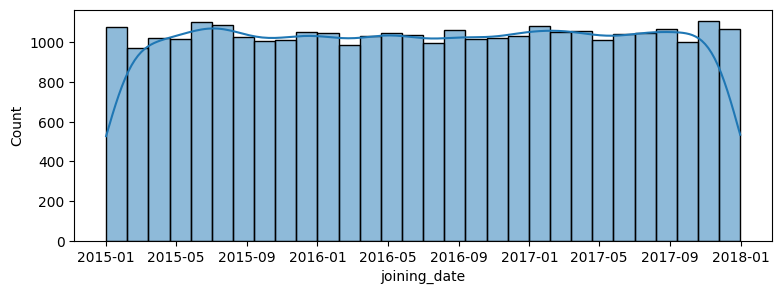

In [ ]:
#joining_date
data['joining_date'] = pd.to_datetime(data['joining_date'])
plt.figure(figsize=(9, 3)) # Set the size of the plot
sns.histplot(data['joining_date'], kde=True, bins=30)

<Axes: xlabel='joined_through_referral', ylabel='count'>

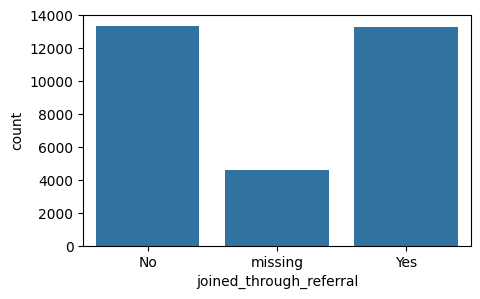

In [ ]:
#joined_through_referral
data['joined_through_referral'] = data['joined_through_referral'].replace('?', 'missing')
plt.figure(figsize=(5, 3)) # Set the size of the plot
sns.countplot(data=data, x='joined_through_referral')


<Axes: xlabel='preferred_offer_types', ylabel='count'>

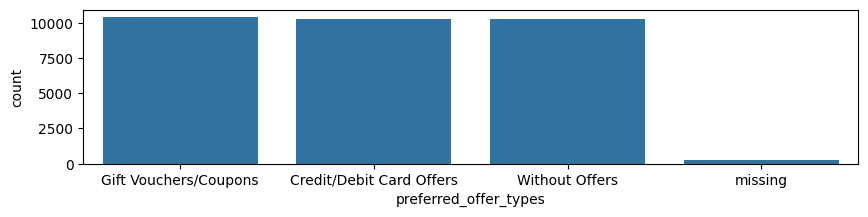

In [ ]:
#preferred_offer_types
data['preferred_offer_types'] = data['preferred_offer_types'].fillna('missing')
plt.figure(figsize=(10, 2)) # Set the size of the plot
sns.countplot(data=data, x='preferred_offer_types')

<Axes: xlabel='medium_of_operation', ylabel='count'>

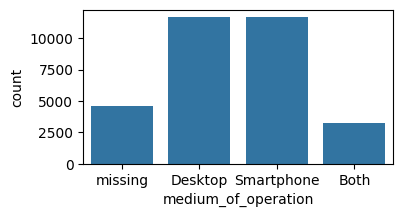

In [ ]:
#medium_of_operation
data['medium_of_operation'] = data['medium_of_operation'].replace('?', 'missing')
plt.figure(figsize=(4, 2)) # Set the size of the plot
sns.countplot(data=data, x='medium_of_operation')

<Axes: xlabel='internet_option', ylabel='count'>

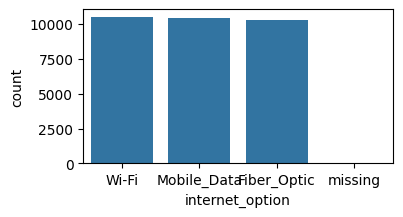

In [ ]:
#internet_option
data['internet_option'] = data['internet_option'].fillna('missing')
plt.figure(figsize=(4, 2)) # Set the size of the plot
sns.countplot(data=data, x='internet_option')

<Axes: xlabel='days_since_last_login', ylabel='count'>

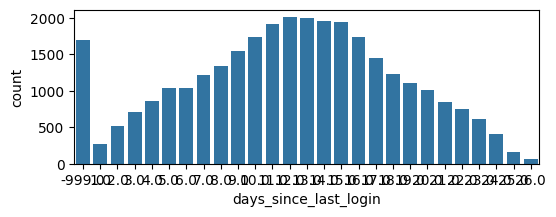

In [ ]:
#days_since_last_login
plt.figure(figsize=(6, 2)) # Set the size of the plot
sns.countplot(data=data, x='days_since_last_login')

<Axes: xlabel='days_since_last_login', ylabel='count'>

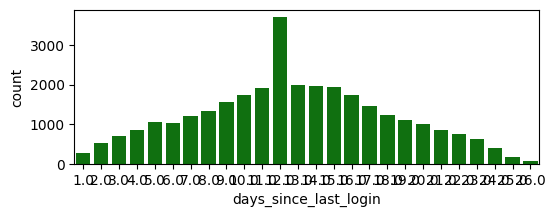

In [ ]:
data['days_since_last_login'] = data['days_since_last_login'].replace(-999, 12)
plt.figure(figsize=(6, 2)) # Set the size of the plot
sns.countplot(data=data, x='days_since_last_login', color='green')


<Axes: xlabel='avg_time_spent', ylabel='Count'>

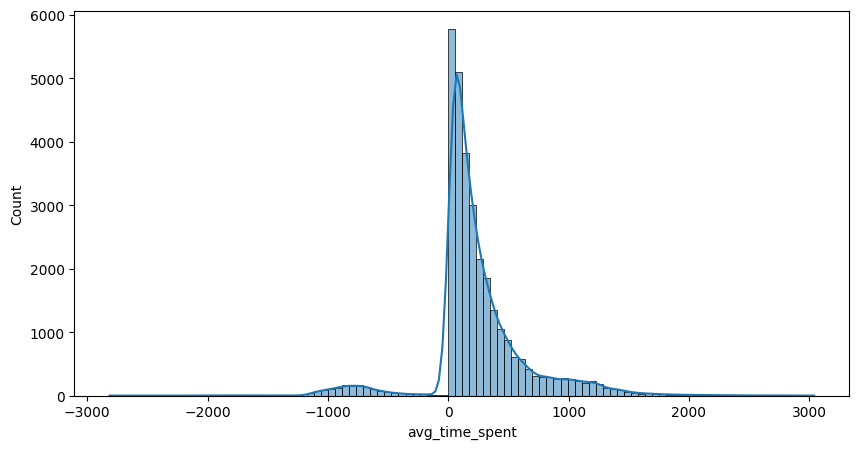

In [ ]:
#avg_time_spent
plt.figure(figsize=(10, 5)) # Set the size of the plot
sns.histplot(data['avg_time_spent'], kde=True, bins=100)

<Axes: xlabel='avg_time_spent', ylabel='Count'>

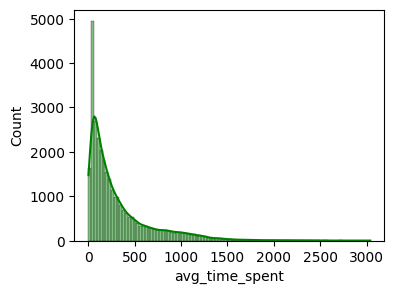

In [ ]:
#avg_time_spent: I think the negative values happen due to sign mistake
data['avg_time_spent'] = data['avg_time_spent'].abs()
plt.figure(figsize=(4, 3)) # Set the size of the plot
sns.histplot(data['avg_time_spent'], kde=True, bins=100, color='green')

<Axes: xlabel='avg_transaction_value', ylabel='Count'>

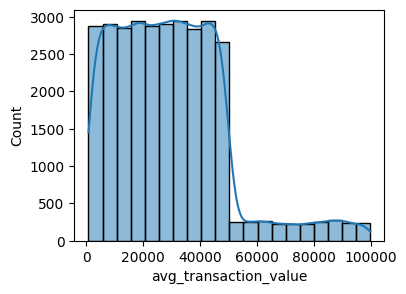

In [ ]:
#avg_transaction_value
plt.figure(figsize=(4, 3)) # Set the size of the plot
sns.histplot(data['avg_transaction_value'], kde=True, bins=20)

['17.0' '10.0' '22.0' ... '4.8526230718076775' '35.10973976579931' nan]


<Axes: xlabel='avg_frequency_login_days', ylabel='Count'>

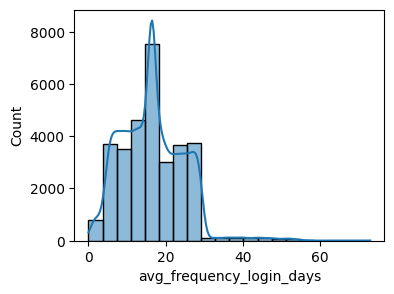

In [ ]:
#avg_frequency_login_days
print(data['avg_frequency_login_days'].unique())

data['avg_frequency_login_days'] = pd.to_numeric(data['avg_frequency_login_days'], errors='coerce')
data['avg_frequency_login_days'] = data['avg_frequency_login_days'].abs()
mean_frequency = data['avg_frequency_login_days'].mean()
data['avg_frequency_login_days'].fillna(mean_frequency, inplace=True)

plt.figure(figsize=(4, 3)) # Set the size of the plot
sns.histplot(data['avg_frequency_login_days'], kde=True, bins=20)

<Axes: xlabel='points_in_wallet', ylabel='Count'>

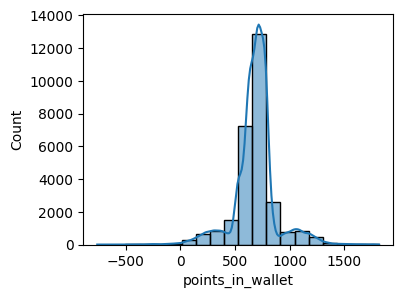

In [ ]:
#points_in_wallet
plt.figure(figsize=(4, 3)) # Set the size of the plot
sns.histplot(data['points_in_wallet'], kde=True, bins=20)

<Axes: xlabel='points_in_wallet', ylabel='Count'>

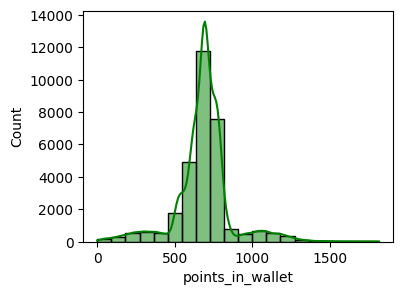

In [ ]:
data['points_in_wallet'] = data['points_in_wallet'].abs()
mean_points = data['points_in_wallet'].mean()
data['points_in_wallet'].fillna(mean_points, inplace=True)
plt.figure(figsize=(4, 3)) # Set the size of the plot
sns.histplot(data['points_in_wallet'], kde=True, bins=20, color= 'green')


<Axes: xlabel='used_special_discount', ylabel='count'>

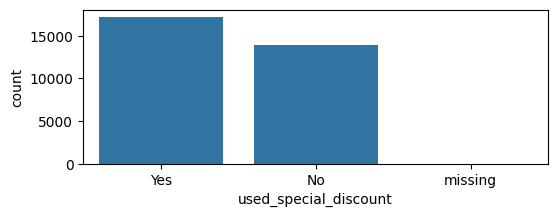

In [ ]:
#used_special_discount
data['used_special_discount'] = data['used_special_discount'].fillna('missing')
plt.figure(figsize=(6, 2)) # Set the size of the plot
sns.countplot(data=data, x='used_special_discount')

<Axes: xlabel='offer_application_preference', ylabel='count'>

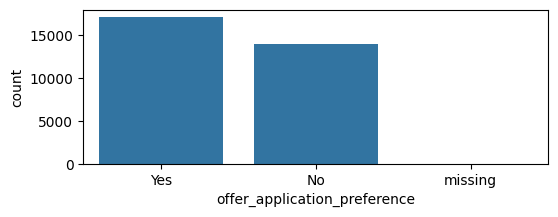

In [ ]:
#offer_application_preference
data['offer_application_preference'] = data['offer_application_preference'].fillna('missing')
plt.figure(figsize=(6, 2)) # Set the size of the plot
sns.countplot(data=data, x='offer_application_preference')

<Axes: xlabel='past_complaint', ylabel='count'>

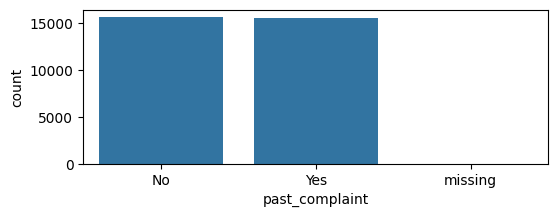

In [ ]:
#past_complaint
data['past_complaint'] = data['past_complaint'].fillna('missing')
plt.figure(figsize=(6, 2)) # Set the size of the plot
sns.countplot(data=data, x='past_complaint')


<Axes: xlabel='complaint_status', ylabel='count'>

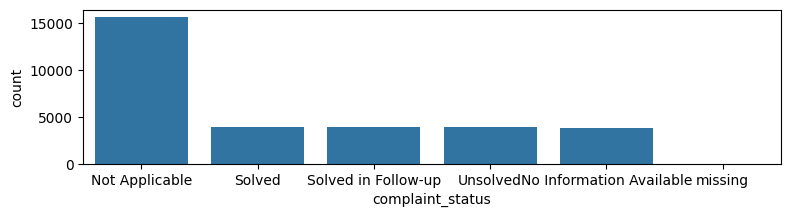

In [ ]:
#complaint_status
data['complaint_status'] = data['complaint_status'].fillna('missing')
plt.figure(figsize=(9, 2)) # Set the size of the plot
sns.countplot(data=data, x='complaint_status')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Products always in Stock'),
  Text(1, 0, 'Quality Customer Care'),
  Text(2, 0, 'Poor Website'),
  Text(3, 0, 'No reason specified'),
  Text(4, 0, 'Poor Product Quality'),
  Text(5, 0, 'Poor Customer Service'),
  Text(6, 0, 'Too many ads'),
  Text(7, 0, 'User Friendly Website'),
  Text(8, 0, 'Reasonable Price'),
  Text(9, 0, 'missing')])

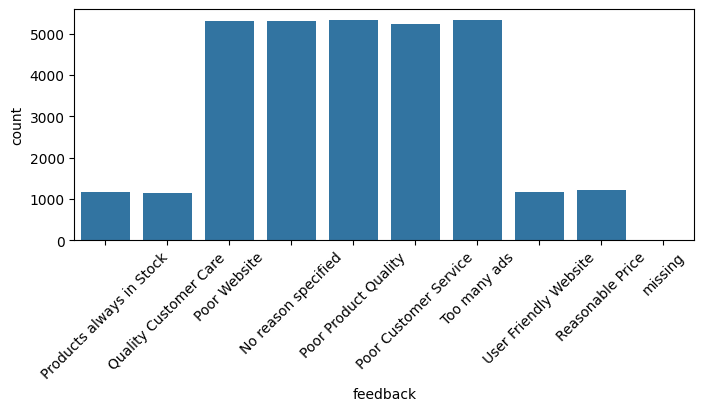

In [ ]:
#feedback
data['feedback'] = data['feedback'].fillna('missing')
plt.figure(figsize=(8, 3)) # Set the size of the plot
sns.countplot(data=data, x='feedback')
plt.xticks(rotation=45)

<Axes: xlabel='churn_risk_score', ylabel='Count'>

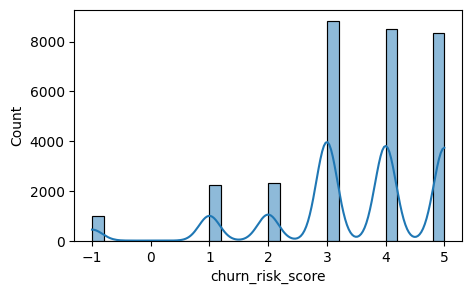

In [ ]:
#churn_risk_score
plt.figure(figsize=(5, 3)) # Set the size of the plot
sns.histplot(data['churn_risk_score'], kde=True, bins=30)



<Axes: xlabel='churn_risk_score', ylabel='Count'>

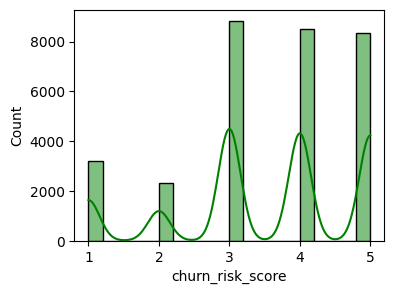

In [ ]:
data['churn_risk_score'] = data['churn_risk_score'].abs()
plt.figure(figsize=(4, 3)) # Set the size of the plot
sns.histplot(data['churn_risk_score'], kde=True, bins=20, color= 'green')

Here is all the data cleaning again